### <center> OpenCV epipolar lines and epipoles computation with sift (1st of mya hackathon) </center>

One can compute and draw the epilines (or epipolar lines) by computing the Fundamental Matrix using the python API OpenCV.

In [1]:
# Import OpenCV, numpy and PyPlot
import cv2
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline  

In [12]:
# Import the 1st and the 50th image from the church data set

#queryimage # left image
img1 = cv2.imread('../EPI_samples/Church_data_set/church_image-raw/church_image_lowres/church_image-raw_0000_lowres.jpg',0)

#queryimage # right image
img2 = cv2.imread('../EPI_samples/Church_data_set/church_image-raw/church_image_lowres/church_image-raw_0100_lowres.jpg',0)

We will use the feature extractor SIFT ("scale-invariant feature transform"), and the FLANN ("Fast Approximate Nearest Neighbor") based matcher, to match points between two points.

In [13]:
# Initialize the SIFT algorithm
sift = cv2.xfeatures2d.SIFT_create();

In [14]:
# find the keypoints and descriptors with SIFT
kp1, des1 = sift.detectAndCompute(img1,None)
kp2, des2 = sift.detectAndCompute(img2,None)

In [15]:
# FLANN parameters
FLANN_INDEX_KDTREE = 0
index_params = dict(algorithm = FLANN_INDEX_KDTREE, trees = 5)
search_params = dict(checks=50)

flann = cv2.FlannBasedMatcher(index_params,search_params)
matches = flann.knnMatch(des1,des2,k=2)

In [16]:
# frame 0 and 30
good = []
pts1_1 = []
pts2_1 = []

# ratio test as per Lowe's paper
for i,(m,n) in enumerate(matches):
    if m.distance < 0.8*n.distance:
        good.append(m)
        pts2_1.append(kp2[m.trainIdx].pt)
        pts1_1.append(kp1[m.queryIdx].pt)

In [17]:
# frame 0 and 50
good = []
pts1_2 = []
pts2_2 = []

# ratio test as per Lowe's paper
for i,(m,n) in enumerate(matches):
    if m.distance < 0.8*n.distance:
        good.append(m)
        pts2_2.append(kp2[m.trainIdx].pt)
        pts1_2.append(kp1[m.queryIdx].pt)

In [18]:
# frame 0 and 70
good = []
pts1_3 = []
pts2_3 = []

# ratio test as per Lowe's paper
for i,(m,n) in enumerate(matches):
    if m.distance < 0.8*n.distance:
        good.append(m)
        pts2_3.append(kp2[m.trainIdx].pt)
        pts1_3.append(kp1[m.queryIdx].pt)

In [19]:
# frame 0 and 100
good = []
pts1_4 = []
pts2_4 = []

# ratio test as per Lowe's paper
for i,(m,n) in enumerate(matches):
    if m.distance < 0.8*n.distance:
        good.append(m)
        pts2_4.append(kp2[m.trainIdx].pt)
        pts1_4.append(kp1[m.queryIdx].pt)

In [20]:
print(str(np.array(pts1_1[1])-np.array(pts2_1[1]))+'\n')
print(str(np.array(pts1_1[1])-np.array(pts2_2[1]))+'\n')
print(str(np.array(pts1_1[1])-np.array(pts2_3[1]))+'\n')
print(str(np.array(pts1_1[1])-np.array(pts2_4[1]))+'\n')

[ 26.71302795 -12.65826416]

[ 26.71302795 -12.65826416]

[ 26.71302795 -12.65826416]

[ 26.71302795 -12.65826416]



The variation in the y-component expresses that is not following the same feature point, so SIFT algorithm will not be the best for specific point tracking algorithm. I will use this just to see the form of the epilines in each image plane, but will use 

In [22]:
# frame 0 and 30
good = []
pts1 = []
pts2 = []

# ratio test as per Lowe's paper
for i,(m,n) in enumerate(matches):
    if m.distance < 0.8*n.distance:
        good.append(m)
        pts2.append(kp2[m.trainIdx].pt)
        pts1.append(kp1[m.queryIdx].pt)

In [23]:
pts1 = np.int32(pts1)
pts2 = np.int32(pts2)
F, mask = cv2.findFundamentalMat(pts1,pts2,cv2.FM_LMEDS)

# We select only inlier points
pts1 = pts1[mask.ravel()==1]
pts2 = pts2[mask.ravel()==1]

In [24]:
def drawlines(img1,img2,lines,pts1,pts2):
    ''' img1 - image on which we draw the epilines for the points in img2
        lines - corresponding epilines '''
    r,c = img1.shape
    img1 = cv2.cvtColor(img1,cv2.COLOR_GRAY2BGR)
    img2 = cv2.cvtColor(img2,cv2.COLOR_GRAY2BGR)
    for r,pt1,pt2 in zip(lines,pts1,pts2):
        color = tuple(np.random.randint(0,255,3).tolist())
        x0,y0 = map(int, [0, -r[2]/r[1] ])
        x1,y1 = map(int, [c, -(r[2]+r[0]*c)/r[1] ])
        img1 = cv2.line(img1, (x0,y0), (x1,y1), color,1)
        img1 = cv2.circle(img1,tuple(pt1),5,color,-1)
        img2 = cv2.circle(img2,tuple(pt2),5,color,-1)
    return img1,img2

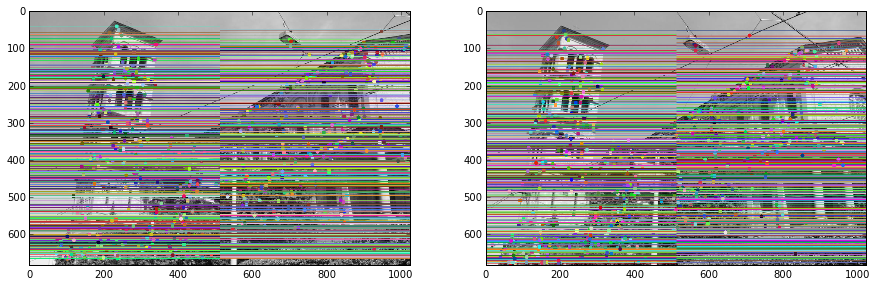

In [28]:
# Find epilines corresponding to points in right image (second image) and
# drawing its lines on left image
lines1 = cv2.computeCorrespondEpilines(pts2.reshape(-1,1,2), 2,F)
lines1 = lines1.reshape(-1,3)
img5,img6 = drawlines(img1,img2,lines1,pts1,pts2)

# Find epilines corresponding to points in left image (first image) and
# drawing its lines on right image
lines2 = cv2.computeCorrespondEpilines(pts1.reshape(-1,1,2), 1,F)
lines2 = lines2.reshape(-1,3)
img3,img4 = drawlines(img2,img1,lines2,pts2,pts1)

plt.rcParams["figure.figsize"] = [15,9]

plt.subplot(121),plt.imshow(img5)
plt.subplot(122),plt.imshow(img3)
plt.show()